In [1]:
# @Bereket

import sys
sys.path.append("C:/Users/CIRL/AppData/Local\Programs/Python/Python39/Lib/site-packages")
sys.path.append("C:/Users/CIRL/AppData/Local\Programs/Python/Python36/Lib/site-packages")

In [38]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import yaml



# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((7*4,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:4].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

Number of images used for calibration:  3


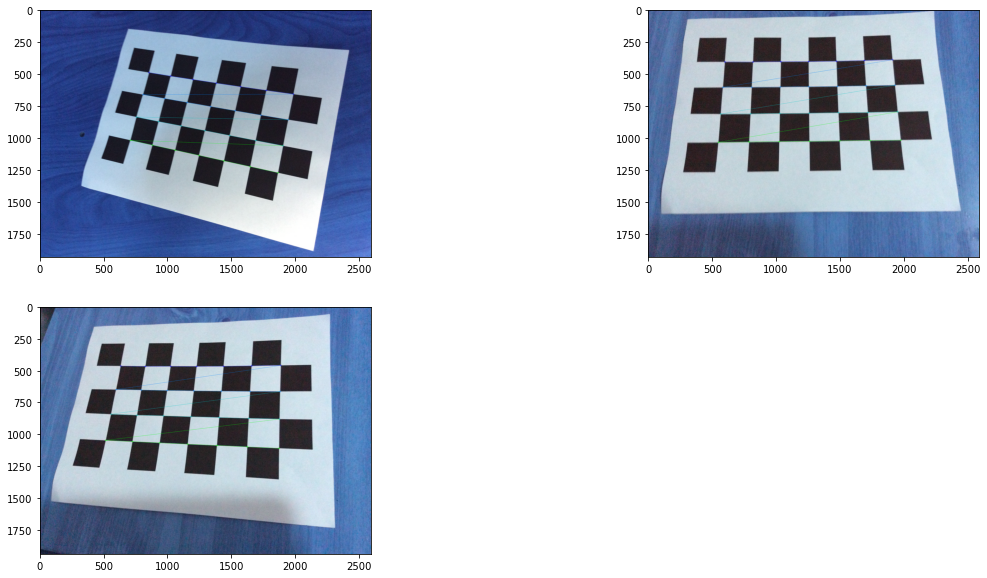

In [40]:
images = glob.glob(r'checkboards/*.JPG')


# path = 'results'
# pathlib.Path(path).mkdir(parents=True, exist_ok=True) 

plt.figure(figsize=(20, 10))
found = 0
for fname in images:  # Here, 10 can be changed to whatever number you like to choose
    img = cv2.imread(fname) # Capture frame-by-frame
    #print(images[im_i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,4), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)   # Certainly, every loop objp is the same, in 3D.
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,4), corners2, ret)
        found += 1
        plt.subplot(2,2,found)
        plt.imshow(img)
        #cv2.imshow('img', img)
        cv2.waitKey(500)
        # if you want to save images with detected corners 
        # uncomment following 2 lines and lines 5, 18 and 19
        # image_name = path + '/calibresult' + str(found) + '.png'
        # cv2.imwrite(image_name, img)

print("Number of images used for calibration: ", found)

# When everything done, release the capture
# cap.release()
cv2.destroyAllWindows()

# calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# transform the matrix and distortion coefficients to writable lists
data = {'camera_matrix': np.asarray(mtx).tolist(),
        'dist_coeff': np.asarray(dist).tolist()}

# and save it to a file
with open("calibration_matrix.yaml", "w") as f:
    yaml.dump(data, f)

In [41]:
mtx

array([[2.48672096e+03, 0.00000000e+00, 1.30784935e+03],
       [0.00000000e+00, 2.45622319e+03, 8.57826914e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [69]:
c = rvecs[0:3]
c

(array([[-0.3372096 ],
        [-0.00959467],
        [-0.01491744]]),
 array([[-0.35300378],
        [ 0.18229724],
        [ 0.05993171]]),
 array([[-0.20698463],
        [ 0.24727541],
        [ 0.2073147 ]]))

In [75]:
f = np.array([rvecs[0], rvecs[1], rvecs[2]])
f[:,:,0].shape

(3, 3)

In [157]:
ext_matrix =  np.append(f[:,:,0], tvecs[2], axis =1)
ext_matrix.shape

(3, 4)

In [158]:
ext_matrix

array([[-3.37209600e-01, -9.59467126e-03, -1.49174353e-02,
        -2.47484771e+00],
       [-3.53003776e-01,  1.82297240e-01,  5.99317057e-02,
        -1.98379120e+00],
       [-2.06984630e-01,  2.47275414e-01,  2.07314705e-01,
         1.35439086e+01]])

In [159]:
proj_matrix = np.dot(mtx,ext_matrix)
proj_matrix.shape

(3, 4)

In [160]:
from skimage import io

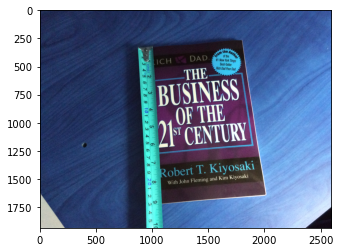

In [161]:
WF_image = cv2.imread('IMG_4711.JPG')
plt.imshow(WF_image)

In [162]:
p1 = (1200, 1600, 1)
p2 = (1000, 250, 1)

In [163]:
w1 = np.linalg.lstsq(proj_matrix, p1)
w2 = np.linalg.lstsq(proj_matrix, p2)

C:\Users\CIRL\AppData\Local\Temp/ipykernel_15072/4048315089.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w1 = np.linalg.lstsq(proj_matrix, p1)
C:\Users\CIRL\AppData\Local\Temp/ipykernel_15072/4048315089.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w2 = np.linalg.lstsq(proj_matrix, p2)


In [153]:
w1[0]

array([-0.34441857,  1.29547698,  0.42931198,  0.04222433])

In [154]:
w2[0]

array([-0.60419135, -1.30775689, -0.37599101,  0.10375967])

In [165]:
w2[0][1] - w1[0][1]

-2.262386796747793